In [3]:
import keras

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [5]:
classifier = Sequential()
#Select 6 Convolution of size 3*3 , Input size of image is 32*32*3, it is a RGB image
classifier.add(Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=(64,64, 3)))
#The output of the Convolution layer is 60*60*6 
#Trainable parameters is (5 * 5 + 1) * 6= 156; 
#(5 * 5 = 25 unit parameters and one bias parameter per filter, a total of 6 filters)

classifier.add( MaxPooling2D( pool_size=(3,3)))
#The output of the Maximum Pooling layer is 30*30*6

#The input matrix size of this layer is 30 * 30 * 6, the filter size used is 3 * 3, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 28 * 28 * 16.
classifier.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
#The output of the Second Convolution layer is (30-3+1)=28
classifier.add( MaxPooling2D( pool_size=(2,2)))
#The output of the Maximum Pooling layer is 14*14*16
classifier.add(Conv2D(16, kernel_size=(5,5), activation='relu'))
#The output of the Second Convolution layer is (14-5+1)=10; 10*10*16
classifier.add( MaxPooling2D( pool_size=(2,2)))
#The output of the Maximum Pooling layer is 5*5*16
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
classifier.add(Flatten())
classifier.add(Dense(120, activation='relu'))

# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
classifier.add(Dense(84, activation='relu'))
classifier.add(Dense(2, activation='softmax'))
classifier.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [6]:
from sklearn.metrics import confusion_matrix
from fastai import *
from fastai.vision import *

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator


train_data = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_data = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


training_set = train_data.flow_from_directory(r"C:\Users\kriti\OneDrive\Desktop\6th sem\IP CS313a\IP project\Matlab Code and dataset\train",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_data.flow_from_directory(r"C:\Users\kriti\OneDrive\Desktop\6th sem\IP CS313a\IP project\Matlab Code and dataset\test",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 276 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [7]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 10,
                         epochs = 30,
                         validation_data = test_set,    
                         validation_steps = 5)


Epoch 1/30
10/10 [==============================] - 18s 2s/step - loss: 0.6870 - accuracy: 0.5325 - val_loss: 0.6652 - val_accuracy: 0.6161
Epoch 2/30
10/10 [==============================] - 2s 195ms/step - loss: 0.6538 - accuracy: 0.6201 - val_loss: 0.5589 - val_accuracy: 0.6818
Epoch 3/30
10/10 [==============================] - 2s 171ms/step - loss: 0.5963 - accuracy: 0.6753 - val_loss: 0.5141 - val_accuracy: 0.7679
Epoch 4/30
10/10 [==============================] - 2s 186ms/step - loss: 0.5693 - accuracy: 0.7230 - val_loss: 0.9638 - val_accuracy: 0.7273
Epoch 5/30
10/10 [==============================] - 2s 167ms/step - loss: 0.5365 - accuracy: 0.7338 - val_loss: 0.4744 - val_accuracy: 0.8125
Epoch 6/30
10/10 [==============================] - 3s 297ms/step - loss: 0.5056 - accuracy: 0.7750 - val_loss: 0.2203 - val_accuracy: 0.8295
Epoch 7/30
10/10 [==============================] - 2s 170ms/step - loss: 0.5404 - accuracy: 0.7331 - val_loss: 0.3843 - val_accuracy: 0.8304
Epoch 8

In [11]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r"C:\Users\kriti\OneDrive\Desktop\brain mri\ex4.jpg", target_size = (64,64))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict(test_image)

training_set.class_indices
print(result)
if result[0][0] == 1:
    prediction = 'NO'
    print(prediction)
else:
    prediction = 'YES'
    print(prediction)


[[1. 0.]]
NO


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,0.956554,1.001933,0.740000,01:44
1,1.089817,1.161637,0.620000,01:47
2,1.004581,1.845354,0.760000,01:49
3,0.974717,0.597029,0.800000,01:42
4,0.781769,0.258100,0.900000,01:43
5,0.617121,0.275394,0.860000,01:38


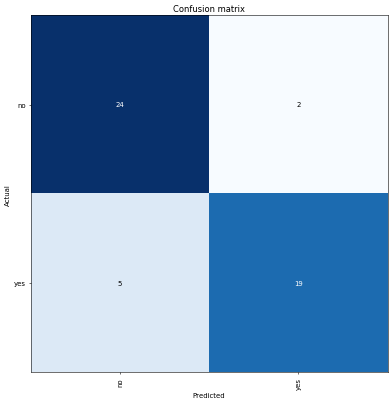

In [9]:
# part 4 Plotting the confusion matrix
DATA_DIR=r'C:\Users\kriti\OneDrive\Desktop\6th sem\IP CS313a\IP project\Matlab Code and dataset\brain_tumor_dataset'
data = ImageDataBunch.from_folder(DATA_DIR, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(flip_vert=True, max_warp=0),
                                  size=224,bs=10, 
                                  num_workers=0).normalize(imagenet_stats)
                                                          
learn = cnn_learner(data, models.resnet34, metrics=accuracy, model_dir=r"C:\Users\kriti\OneDrive\Desktop\6th sem\IP CS313a\IP project\Matlab Code and dataset\brain_tumor_dataset")
learn.lr_find()
learn.fit_one_cycle(6,1e-2)
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=50)